In [1]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
ROOT_FOLDER = "."
SEED = 42

FEATURE_COLS = [
    "avg_change_pupil_left",
    "avg_change_pupil_right",
    "avg_change_total_pupil",
    "peak_pupil_left",
    "peak_pupil_right",
    "peak_total_pupil",
    "short_fixation_count",
    "medium_fixation_count",
    "long_fixation_count",
    "avg_fixation_duration",
    "peak_fixation_duration",
    "saccadic_count",
    "avg_saccadic_durations",
    "avg_saccadic_velocity",
    "peak_saccadic_velocity",
]

TARGET_COL = "qcae_score_after"

In [3]:
df = pd.read_csv(os.path.join(ROOT_FOLDER, "data", "data_df.csv"))

# Feature selection by correlation

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features. I used a threshold of 0.9, thus two features should have more than 0.9 correlation score to identify these two are highly dependent.

In [4]:
# Display a feature correlation matrix
df[FEATURE_COLS].corr()

,avg_change_pupil_left,avg_change_pupil_right,avg_change_total_pupil,peak_pupil_left,peak_pupil_right,peak_total_pupil,short_fixation_count,medium_fixation_count,long_fixation_count,avg_fixation_duration,peak_fixation_duration,saccadic_count,avg_saccadic_durations,avg_saccadic_velocity,peak_saccadic_velocity
avg_change_pupil_left,1.000000,0.591424,0.631664,-0.039932,-0.021363,-0.027756,0.214638,0.264651,0.030822,-0.054498,0.048736,0.222802,-0.013205,-0.240046,0.088203
avg_change_pupil_right,0.591424,1.000000,0.929940,0.022705,0.039163,-0.021843,0.139873,0.188367,0.021296,-0.049613,0.018357,0.145735,0.071364,-0.165804,0.055341
avg_change_total_pupil,0.631664,0.929940,1.000000,0.081330,0.095761,0.056757,0.142545,0.184402,0.047787,-0.059981,0.015620,0.143991,-0.016456,-0.267903,-0.027968
peak_pupil_left,-0.039932,0.022705,0.081330,1.000000,0.877301,0.930958,-0.057697,0.022598,-0.096982,0.066407,0.063811,-0.013133,0.033412,-0.213787,-0.126956
peak_pupil_right,-0.021363,0.039163,0.095761,0.877301,1.000000,0.885307,-0.069026,0.038201,-0.066979,0.098440,0.027148,-0.019744,0.151917,-0.155323,-0.034137
peak_total_pupil,-0.027756,-0.021843,0.056757,0.930958,0.885307,1.000000,-0.121137,-0.036030,-0.066236,0.089702,0.023141,-0.038284,0.057180,-0.204226,-0.184797
short_fixation_count,0.214638,0.139873,0.142545,-0.057697,-0.069026,-0.121137,1.000000,0.810438,-0.048653,-0.610034,0.059589,0.929249,-0.275479,0.281744,0.414484
medium_fixation_count,0.264651,0.188367,0.184402,0.022598,0.038201,-0.036030,0.810438,1.000000,0.179841,-0.253615,0.020904,0.696242,0.050620,0.185780,0.418829
long_fixation_count,0.030822,0.021296,0.047787,-0.096982,-0.066979,-0.066236,-0.048653,0.179841,1.000000,0.502343,0.346358,-0.105732,0.186467,0.039729,-0.035107
avg_fixation_duration,-0.054498,-0.049613,-0.059981,0.066407,0.098440,0.089702,-0.610034,-0.253615,0.502343,1.000000,0.261548,-0.581515,0.350182,-0.315810,-0.315273


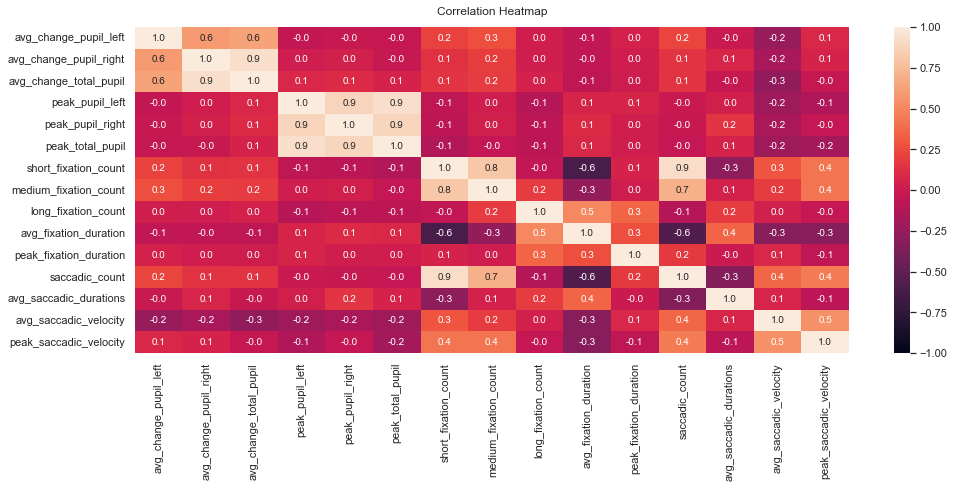

In [5]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df[FEATURE_COLS].corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")
heatmap.set_title("Correlation Heatmap", pad=12)
plt.savefig("src/3_heatmap.pdf", transparent=True, bbox_inches="tight")

# Evaluation and discussion
To understand how well the model performs to test set, the errors (ME and MAE) distributions are displayed. It suggests that the range of errors in empathy score predictions are high.

In [6]:
p lot_me_df = pd.read_csv(os.path.join("src", "plot_me_df.csv"))
plot_mae_df = pd.read_csv(os.path.join("src", "plot_mae_df.csv"))

In [7]:
# Select the best model for each model type to be analyzed in the boxplot
selected_models = [
    "Linear (features from SFS)",
    "Ridge (features from SFS)",
    "Decision tree (all features)"
]

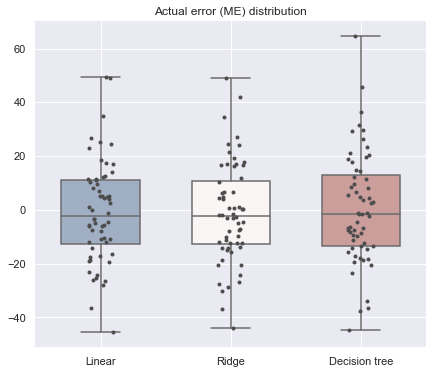

In [8]:
# Plot the actual error on y scores: y_true - y_pred
boxplot_me_df = plot_me_df[plot_me_df["model"].isin(selected_models)]

# Rename the model name for the ease of visualization
boxplot_me_df = boxplot_me_df.replace({"model": {
    "Linear (features from SFS)": "Linear",
    "Ridge (features from SFS)": "Ridge",
    "Decision tree (all features)": "Decision tree"
}})

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="model", y="ME", data=boxplot_me_df,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="model", y="ME", data=boxplot_me_df,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="")
ax.set_title("Actual error (ME) distribution")
sns.despine(trim=True, left=True)

plt.savefig("src/5_actual_err_box_plot.pdf", transparent=True)

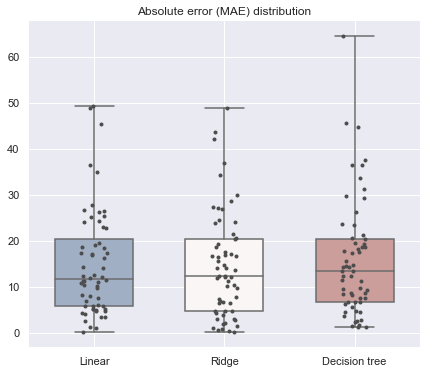

In [9]:
# Plot the absolute error on y scores: |y_true - y_pred|, as MAE
boxplot_mae_df = plot_mae_df[plot_mae_df["model"].isin(selected_models)]

# Rename the model name for the ease of visualization
boxplot_mae_df = boxplot_mae_df.replace({"model": {
    "Linear (features from SFS)": "Linear",
    "Ridge (features from SFS)": "Ridge",
    "Decision tree (all features)": "Decision tree"
}})

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="model", y="MAE", data=boxplot_mae_df,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="model", y="MAE", data=boxplot_mae_df,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="")
ax.set_title("Absolute error (MAE) distribution")
sns.despine(trim=True, left=True)

plt.savefig("src/5_abs_err_box_plot.pdf", transparent=True)